In [1]:
from community_knapsack import *
from evaluation.evalutils import *
import matplotlib.pyplot as plt

In [2]:
# Algorithms
# Brute force excluded because it cannot solve n>=50.
exact_algorithms = [
    PBSingleAlgorithm.MEMOIZATION,
    PBSingleAlgorithm.DYNAMIC_PROGRAMMING,
    PBSingleAlgorithm.BRANCH_AND_BOUND,
    PBSingleAlgorithm.ILP_SOLVER
]
exact_labels = ['MEM', 'DYP', 'BRB', 'IPS']

approximation_algorithms = [
    PBSingleAlgorithm.GREEDY,
    PBSingleAlgorithm.RATIO_GREEDY,
    PBSingleAlgorithm.FPTAS,
    PBSingleAlgorithm.SIMULATED_ANNEALING,
    PBSingleAlgorithm.GENETIC_ALGORITHM
]
approximation_labels = ['GRE', 'RAG', 'FPA', 'SIA', 'GEN']

# PyPlot Configuration
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
alpha_cycle = [1, 1, 1, 1, 1]
marker_size_cycle = [4, 4, 4, 4, 4]

In [3]:
# This notebook explores the runtime and value of algorithms as the number of votes (and thus number of votes) increase:

In [31]:
# Generate Problems
generator = PBGenerator(seed=181)

num_projects = 100

min_voters = 2_000
max_voters = 100_000
step_voters = 2_000

budget = 100_000
cost_bound = (5_000, 50_000)

problems = []
for num_voters in range(min_voters, max_voters + 1, step_voters):
    problems.append(generator.generate_single_problem(
        num_projects_bound=(num_projects, num_projects),
        num_voters_bound=(num_voters, num_voters),
        budget_bound=(budget, budget),
        cost_bound=cost_bound
    ))

In [32]:
def plot_all_y(x_axis, y_axes, marker='o-', x_label='', y_label='', labels=None, marker_sizes=None, colors=None, alphas=None, fix_y=None):
    valid = lambda feature, index: feature and index < len(feature) and feature[index] != -1
    for idx, y_axis in enumerate(y_axes):
        plot = plt.plot(x_axis, y_axis, marker)
        if valid(labels, idx):
            plot[0].set_label(labels[idx])
        if valid(marker_sizes, idx):
            plot[0].set_markersize(marker_sizes[idx])
        if valid(colors, idx):
            plot[0].set_color(colors[idx])
        if valid(alphas, idx):
            plot[0].set_alpha(alphas[idx])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.minorticks_on()
    ax = plt.gca()
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
    ax.xaxis.offsetText.set_visible(False)
    ax.set_xticks([tick for tick in range(min_voters, max_voters + 1, step_voters)], minor=True)
    plt.grid(which='both', alpha=0.2)
    if fix_y: ax.set_ylim(fix_y)
    legend = plt.legend()
    for idx in range(len(labels if labels else [])):
        legend.legend_handles[idx].set_markersize(4)
        legend.legend_handles[idx].set_alpha(1.0)

In [39]:
exact_results = solve_problems(problems, exact_algorithms, timeout=120, max_fail=-1, file_name='ext-increasing-voters.txt', output=True)

In [40]:
approximation_results = solve_problems(problems, approximation_algorithms, timeout=120, max_fail=-1, file_name='apx-increasing-voters.txt', output=True)

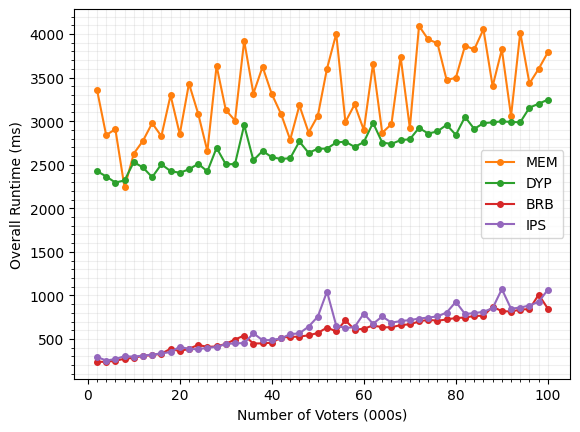

In [42]:
# EXACT ALGORITHMS RUNTIME OVER THE PROBLEMS
# Brute force excluded because it cannot solve n>=50.
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(exact_results, len(problems), algorithm, 2) for algorithm in exact_algorithms],
    labels=exact_labels,
    marker_sizes=marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Runtime (ms)',
    colors=color_cycle[1:]
)

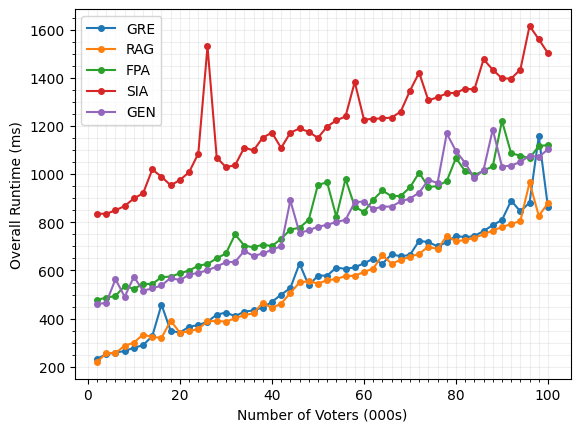

In [44]:
# APPROXIMATION ALGORITHMS RUNTIME OVER THE PROBLEMS
# Brute force excluded because it cannot solve n>=50.
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(approximation_results, len(problems), algorithm, 2) for algorithm in approximation_algorithms],
    labels=approximation_labels,
    marker_sizes=marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Runtime (ms)',
    colors=color_cycle
)

In [54]:
from timeit import default_timer as timer
def fn_solve_problems(problem_list, algorithms, file_name=None, output=True):
    if file_name and os.path.exists(file_name):
        with open(file_name, 'r', encoding='utf-8') as file:
            return ast.literal_eval(''.join(file.readlines()))

    results = [{algorithm.name: (None, None, None) for algorithm in algorithms} for _ in range(len(problem_list))]
    for algorithm in algorithms:
        if output:
            print(f'Processing {algorithm.name}')

        for pid, problem in enumerate(problem_list):
            if output:
                print(pid)

            start = timer()
            result = algorithm(problem.budget, problem.costs, problem.values)
            end = timer()
            results[pid][algorithm.name] = (result[1], -1, (end - start) * 1000)

    if file_name:
        with open(file_name, 'w+', encoding='utf-8') as file:
            file.writelines(str(results))

    return results

In [56]:
raw_exact_results = fn_solve_problems(problems, exact_algorithms, file_name='ext_raw_increasing_voters.txt')

In [60]:
raw_approximation_results = fn_solve_problems(problems, approximation_algorithms, file_name='apx_raw_increasing_voters.txt')

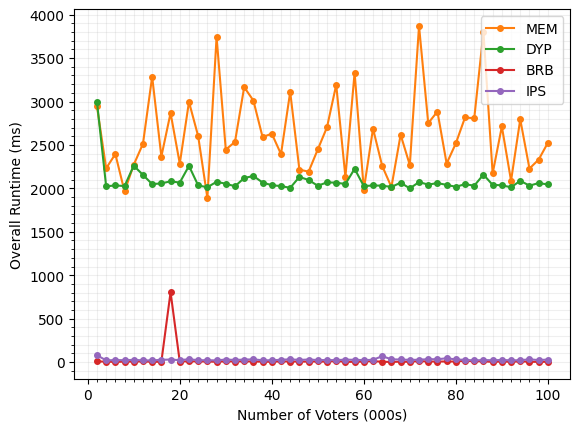

In [59]:
# EXACT ALGORITHMS RUNTIME OVER THE PROBLEMS
# Brute force excluded because it cannot solve n>=50.
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(raw_exact_results, len(problems), algorithm, 2) for algorithm in exact_algorithms],
    labels=exact_labels,
    marker_sizes=marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Runtime (ms)',
    colors=color_cycle[1:]
)

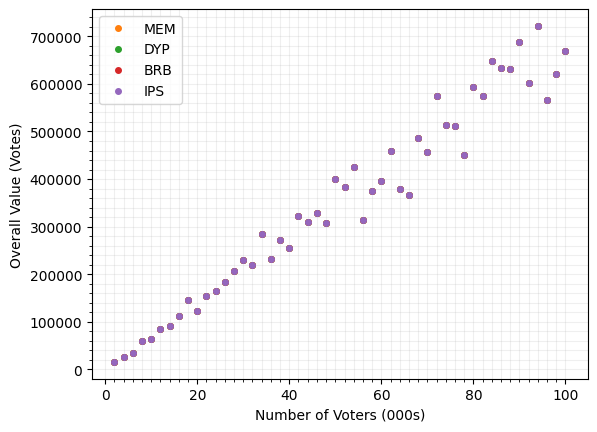

In [64]:
# EXACT ALGORITHMS VALUES OVER THE PROBLEMS
# Brute force excluded because it cannot solve n>=50.
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(raw_exact_results, len(problems), algorithm, 0) for algorithm in exact_algorithms],
    labels=exact_labels,
    marker='o',
    marker_sizes=marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Value (Votes)',
    colors=color_cycle[1:]
)

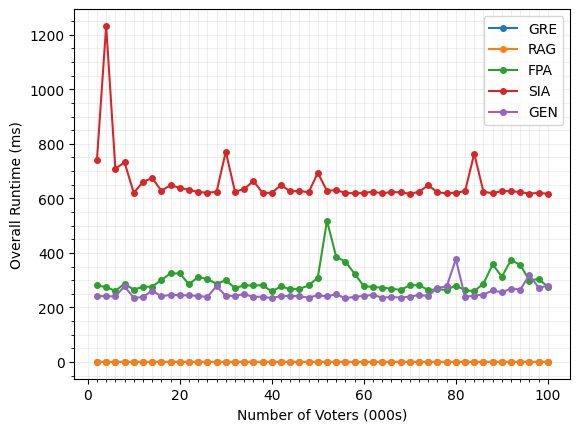

In [65]:
# APPROXIMATION ALGORITHMS RUNTIME OVER THE PROBLEMS
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(raw_approximation_results, len(problems), algorithm, 2) for algorithm in approximation_algorithms],
    labels=approximation_labels,
    marker_sizes=marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Runtime (ms)',
    colors=color_cycle
)

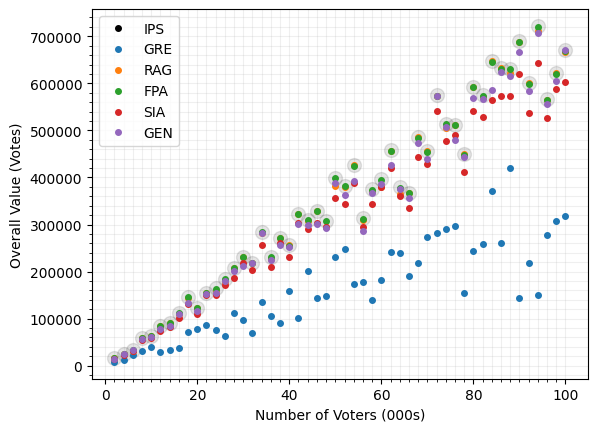

In [69]:
# APPROXIMATION ALGORITHMS RUNTIME OVER THE PROBLEMS
plot_all_y(
    x_axis=list(range(min_voters, max_voters + 1, step_voters)),
    y_axes=[get_y(raw_exact_results, len(problems), PBSingleAlgorithm.ILP_SOLVER, 0)] + [get_y(raw_approximation_results, len(problems), algorithm, 0) for algorithm in approximation_algorithms],
    labels=['IPS'] + approximation_labels,
    marker='o',
    marker_sizes=[10] + marker_size_cycle,
    x_label='Number of Voters (000s)',
    y_label='Overall Value (Votes)',
    colors=['black'] + color_cycle,
    alphas=[0.1] + alpha_cycle
)